In [1]:
library('ggplot2')
library('plyr')
library('tidyr')
library('parallel')
library('lme4')
library("scales")
source('freq-vs-info-content_helper.R')
source('ss_analysis_new.R')
source('config.R')

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘reshape’


The following object is masked from ‘package:Matrix’:

    expand


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following objects are masked from ‘package:plyr’:

    rename, round_any


Loading required package: fit.models

Registered S3 methods overwritten by 'robust':
  method              from      
  plot.covfm          fit.models
  print.covfm         fit.models
  summary.covfm       fit.models
  print.summary.covfm fit.models

rlm is already registered in the fit.models registry

covfm is already registered in the fit.models registry


Attaching package: ‘robust’


The following objects are masked from ‘package:fit.models’:

    ddPlot.covfm, distancePlot.covfm, ellipsesPlot.covfm,
    screePlot.covfm




In [2]:
# Equivalent to Cross-Linguistic Correlations in Cross-Linguistic PIC (1T, Books 2012, OPUS, BNC)

In [3]:
languages = c('ENGLISH',"SPANISH",'FRENCH', 'DUTCH', 'GERMAN','SWEDISH','CZECH','POLISH','ROMANIAN','ITALIAN','PORTUGUESE')
withoutEndMarker = lapply(languages, function(language){getScoresForLanguage(
   paths[['current_filtered']], 'Google1T',0,language, endMarker=F,  corMethod='spearman', opusFilter=T)})

[1] "Filtering..."
[1] "filtered number in ENGLISH: 49227"
[1] "original number in ENGLISH: 49227"
[1] "Limiting analysis"
[1] "Getting correlations"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "Filtering..."
[1] "filtered number in SPANISH: 47429"
[1] "original number in SPANISH: 47429"
[1] "Limiting analysis"
[1] "Getting correlations"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "Filtering..."
[1] "filtered number in FRENCH: 47308"
[1] "original number in FRENCH: 47308"
[1] "Limiting analysis"
[1] "Getting correlatio

In [4]:
g1t_corpusCounts = do.call('rbind',lapply(withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language= language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
g1t_corpusCounts

language,numTokens,numTokens_pretty,analysisCount
<chr>,<dbl>,<chr>,<int>
English,276685251811,"276,685,251,811",25000
Spanish,33389707256,"33,389,707,256",25000
French,30368045249,"30,368,045,249",25000
Dutch,26071590116,"26,071,590,116",25000
German,20033811400,"20,033,811,400",25000
Swedish,22433486749,"22,433,486,749",25000
Czech,17936380776,"17,936,380,776",25000
Polish,19740908557,"19,740,908,557",25000
Romanian,21752377486,"21,752,377,486",25000


In [5]:
nem = do.call('rbind', lapply(withoutEndMarker, function(x){x$score}))
nem$xv = expandColNames(nem$xv)
nem$yv = expandColNames(nem$yv)
#Better word-level metric names


nem = merge(nem,g1t_corpusCounts, by='language')
nem$language = as.factor(sapply(nem$language, simpleCap))
nem$languageCount = sapply(1:length(nem$language), function(x){paste0(nem$language[x], ' (', round(nem$numTokens[x] / 1000000000,0),'b)' )})
nem$yv_xv = paste(nem$yv, nem$xv, sep='-')

In [6]:
books2012_languages = c('eng-all',"spa-all",'fre-all','ger-all','rus-all','heb-all', 'ita-all')
books2012_withoutEndMarker = lapply(books2012_languages, function(language){
    getScoresForLanguage(paths[['current_filtered']],'GoogleBooks2012',0,
        language, endMarker=T,  corMethod='spearman', contextLimit=0, opusFilter=T)})
names(books2012_withoutEndMarker) = books2012_languages

[1] "Filtering..."
[1] "filtered number in eng-all: 49013"
[1] "original number in eng-all: 49013"
[1] "Limiting analysis"
[1] "Getting correlations"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "Filtering..."
[1] "filtered number in spa-all: 48133"
[1] "original number in spa-all: 48133"
[1] "Limiting analysis"
[1] "Getting correlations"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "Filtering..."
[1] "filtered number in fre-all: 46051"
[1] "original number in fre-all: 46051"
[1] "Limiting analysis"
[1] "Getting correlat

In [7]:
gb12_corpusCounts = do.call('rbind',lapply(books2012_withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language = language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
gb12_corpusCounts$language = sapply(gb12_corpusCounts$language, function(x){
    gb12_langRemapper[[x]]
})
gb12_corpusCounts

,language,numTokens,numTokens_pretty,analysisCount
,<chr>,<dbl>,<chr>,<int>
eng-all,English,221671136169,"221,671,136,169",25000
spa-all,Spanish,37759832199,"37,759,832,199",25000
fre-all,French,44108907485,"44,108,907,485",25000
ger-all,German,16783263694,"16,783,263,694",25000
rus-all,Russian,12570574078,"12,570,574,078",25000
heb-all,Hebrew,2922809597,"2,922,809,597",25000
ita-all,Italian,13458908311,"13,458,908,311",25000


In [8]:
books2012.nem = do.call('rbind', lapply(books2012_withoutEndMarker, function(x){x$score}))
books2012.nem$xv = expandColNames(books2012.nem$xv)
books2012.nem$yv = expandColNames(books2012.nem$yv)
#Better word-level metric names

books2012.nem$language = sapply(books2012.nem$language, function(x){
    gb12_langRemapper[[x]]
})

books2012.nem = merge(books2012.nem,gb12_corpusCounts, by='language')
books2012.nem$language = factor(books2012.nem$language)
books2012.nem$languageCount = sapply(1:length(books2012.nem$language), function(x){paste0(books2012.nem$language[x], ' (', round(books2012.nem$numTokens[x] / 1000000000,0),'b)' )})
books2012.nem$yv_xv = paste(books2012.nem$yv, books2012.nem$xv, sep='-')

In [9]:
opus_languages = c('en','ru','he','de','fr','es','cs','pt', 'pl','ro','sv','it','nl')
opus_withoutEndMarker = lapply(1:length(opus_languages), function(i){
    getScoresForLanguage(paths[['current_filtered']],'OPUS',0,opus_languages[i], 
                         endMarker=T,  corMethod='spearman', opusFilter=T)})
names(opus_withoutEndMarker) = opus_languages

[1] "Filtering..."
[1] "filtered number in en: 50000"
[1] "original number in en: 50000"
[1] "Limiting analysis"
[1] "Getting correlations"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "Filtering..."
[1] "filtered number in ru: 50000"
[1] "original number in ru: 50000"
[1] "Limiting analysis"
[1] "Getting correlations"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "Filtering..."
[1] "filtered number in he: 50000"
[1] "original number in he: 50000"
[1] "Limiting analysis"
[1] "Getting correlations"
[1] "Missing something!"

In [10]:
opus_corpusCounts = do.call('rbind',lapply(opus_withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language= language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
opus_corpusCounts

,language,numTokens,numTokens_pretty,analysisCount
,<chr>,<dbl>,<chr>,<int>
en,English,647883027,"647,883,027",25000
ru,Russian,43069764,"43,069,764",25000
he,Hebrew,65327266,"65,327,266",25000
de,German,39534389,"39,534,389",25000
fr,French,173182282,"173,182,282",25000
es,Spanish,201940618,"201,940,618",25000
cs,Czech,95383149,"95,383,149",25000
pt,Portuguese,108384441,"108,384,441",25000
pl,Polish,67044315,"67,044,315",25000


In [11]:
opus.nem = do.call('rbind', lapply(opus_withoutEndMarker, function(x){x$score}))
opus.nem$xv = expandColNames(opus.nem$xv)
opus.nem$yv = expandColNames(opus.nem$yv)
#Better word-level metric names
opus.nem = merge(opus.nem,opus_corpusCounts, by='language')
opus.nem$language = as.factor(sapply(opus.nem$language, simpleCap))
books2012.nem$yv_xv = paste(books2012.nem$yv, books2012.nem$xv, sep='-')
opus.nem$languageCount = sapply(1:length(opus.nem$language), function(x){paste0(opus.nem$language[x], ' (', round(opus.nem$numTokens[x] / 1000000,0),'m)' )})

In [12]:
opus_datasets = do.call('rbind',lapply(opus_withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
opus_datasets$dataset = 'OPUS'                      
                        
gb12_datasets = do.call('rbind',lapply(books2012_withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
gb12_datasets$dataset = 'GB12'

g1t_datasets = do.call('rbind',lapply(withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
g1t_datasets$dataset = 'G1T'

In [13]:
combined_datasets = rbind.fill(opus_datasets, gb12_datasets, g1t_datasets)
combined_datasets$dataset_language = paste0(combined_datasets$dataset, ': ', combined_datasets$language)

nem$languageLabel = paste('1T:', nem$languageCount)
books2012.nem$languageLabel = paste('GB12:', books2012.nem$languageCount)
opus.nem$languageLabel = paste('OPUS:', opus.nem$languageCount)
nem$dataset = '1T'
books2012.nem$dataset = 'GB12'
opus.nem$dataset = 'OPUS'
nem_combined = rbind.fill(nem, books2012.nem, opus.nem)


Warning message:
“Ignoring unknown aesthetics: fill”
Warning message:
“Ignoring unknown aesthetics: fill”
Warning message:
“Ignoring unknown aesthetics: fill”


png 
  2

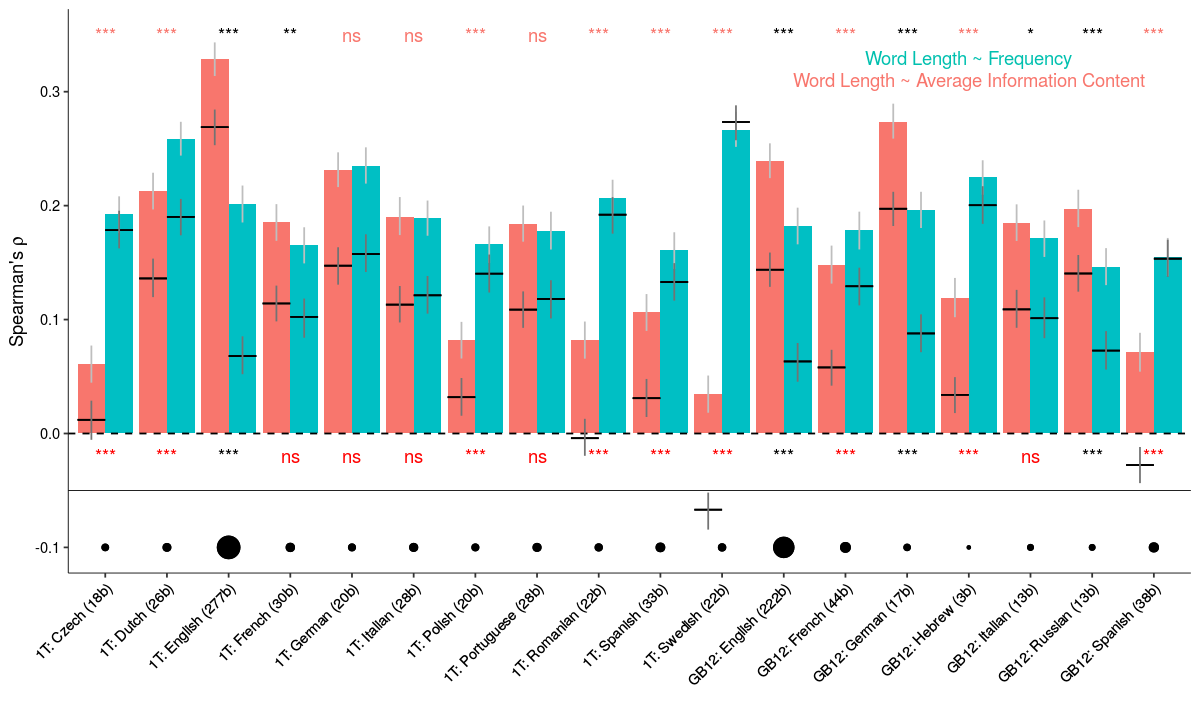

In [14]:
xv_list = c("Number of Characters")
yv_list = c("Unigram Surprisal",'Trigram Surprisal')

dodge <- position_dodge(width=0.9)
correlations = subset(nem_combined, xv %in% xv_list & yv %in% yv_list & !residualize & dataset
!= "OPUS")
partial_correlations = subset(nem_combined, xv %in% xv_list & yv %in% yv_list & 
residualize & dataset != "OPUS")
p_values = subset(nem_combined, xv %in% xv_list & yv == "Difference: Unigram Surprisal - Trigram Surprisal")
p_values$sig = mapply(sig_symbol, p_values$pvalue, p_values$direction)
p_values$direction[p_values$sig =='ns'] = 'higher' # makes ns red, b/c inconsistent with P11

crosslinguistic_predict_len = ggplot(correlations 
) + geom_bar(aes(x=languageLabel, y=singleCor, fill=yv),  stat='identity', position='dodge'
)   + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme(panel.background = element_blank(
), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), axis.line.x = element_line(color="black", size = .25),
    axis.line.y = element_line(color="black", size = .25)) + geom_hline(aes(yintercept = 0), 
linetype = 'dashed') + ylab(expression(paste("Spearman's ",rho))) + xlab(''
) +  theme(legend.position="none")  + geom_point(aes(x= languageLabel, y=-.1, size=numTokens)
) + scale_size_area(
) + geom_hline(aes(yintercept = -.05), size=.25) +  geom_linerange(aes(x=languageLabel, 
ymin=lower, ymax=upper, fill=yv), position=dodge, colour='gray'
) + geom_errorbar(data = subset(partial_correlations, dataset != 'OPUS'), aes(x=languageLabel,
 ymin=singleCor, ymax=singleCor, fill=yv), position='dodge') +  geom_linerange(data=subset(
partial_correlations, dataset != 'OPUS'), aes(
 x=languageLabel, ymin=lower, ymax=upper, fill=yv), position=dodge, colour='grey45'
) + geom_text(data=subset(p_values, direction == 'lower' & !residualize & dataset
    != "OPUS"), aes(x=languageLabel, y=.35, label=sig)                                                                                            
) + geom_text(data=subset(p_values, direction == 'higher' & !residualize & dataset 
    !="OPUS"), aes(x=languageLabel, y=.35, label=sig, colour='red')
) + geom_text(data=subset(p_values, direction == 'lower' & residualize & dataset 
    != "OPUS"), aes(x=languageLabel, y=-.02, label=sig)
) + geom_text(data=subset(p_values, direction == 'higher' & residualize & dataset
    != "OPUS"), aes(x=languageLabel, y=-.02, label=sig), colour='red'
)  + annotate("text", x = 'GB12: Hebrew (3b)', y = .33, 
    label = "Word Length ~ Frequency", color="#00C0AF") + annotate("text", 
    x = 'GB12: Hebrew (3b)', y = .31, 
    label = "Word Length ~ Average Information Content", color="#F8766D") 



pdf('pdfs/crosslinguistic-unigramTrigramLength_dictionaryFiltered.pdf', width=10, height=5)
print(crosslinguistic_predict_len)
dev.off()

options(repr.plot.width=10, repr.plot.height=6, jupyter.plot_mimetypes = 'image/png')
print(crosslinguistic_predict_len)

In [15]:
withoutEndMarker[[1]]$df$word[24900:25000]

[1] bridegroom        teacup            immovable         subvert          
  [5] conditionally     consultancies     reaffirm          sphincter        
  [9] nave              contraindications overruled         trad             
 [13] uncomplicated     gingerbread       spotter           grammars         
 [17] succulent         arrhythmia        spines            redirects        
 [21] etch              sowing            spline            frustrate        
 [25] trolleys          catapult          journeyman        epidural         
 [29] subjectivity      supervises        concertos         tarmac           
 [33] ruse              tenuous           pars              chorale          
 [37] configures        orig              recitation        busting          
 [41] laziness          stopwatch         approachable      hillbillies      
 [45] kneeling          subterranean      revolutionized    imitations       
 [49] multivitamin      choreographer     discreetly        nonpartisan      
 [53] vise              warlords          interlink         concussion       
 [57] confidentially    dredged           twitch            prefixed         
 [61] lifeboat          quell             subscript         belles           
 [65] astrophysical     bulging           resuming          undervalued      
 [69] weathering        retroactively     rescinded         schooner         
 [73] reinvested        resets            amphibious        egos             
 [77] trampolines       urethane          derailed          rappers          
 [81] postulated        extortion         outpouring        stateroom        
 [85] pronouns          puss              beneficially      hither           
 [89] apprehend         recesses          organically       stroked          
 [93] mitotic           pursues           subroutines       barbaric         
 [97] punks             rainwater         individualism     alveolar         
[101] fugue            
1068335 Levels: ´ ´´ ´' ´'´ ´'´´'´´'´´'´´'´´'´´ ´'´´'´´'´´'´´'´´'´´'´´'´´'´ ... 龍脈